In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [62]:
data=pd.read_csv('Iris.csv')
data.head(120)

,sepal length,sepal width,petal length,petal width,iris,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,5.1,3.5,1.4,0.2,Iris-setosa,NaN,NaN,NaN,NaN
1,4.9,3.0,1.4,0.2,Iris-setosa,NaN,NaN,NaN,NaN
2,4.7,3.2,1.3,0.2,Iris-setosa,NaN,NaN,NaN,NaN
3,4.6,3.1,1.5,0.2,Iris-setosa,NaN,NaN,NaN,NaN
4,5.0,3.6,1.4,0.2,Iris-setosa,NaN,NaN,NaN,NaN
5,5.4,3.9,1.7,0.4,Iris-setosa,NaN,NaN,NaN,NaN
6,4.6,3.4,1.4,0.3,Iris-setosa,NaN,NaN,NaN,NaN
7,5.0,3.4,1.5,0.2,Iris-setosa,NaN,NaN,NaN,NaN
8,4.4,2.9,1.4,0.2,Iris-setosa,NaN,NaN,NaN,NaN
9,4.9,3.1,1.5,0.1,Iris-setosa,NaN,NaN,NaN,NaN


In [32]:
#preprocessing the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['iris']=le.fit_transform(data['iris'])
data.head()
#for col in data.columns:
   # print(col)


,sepal length,sepal width,petal length,petal width,iris,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,5.1,3.5,1.4,0.2,0,NaN,NaN,NaN,NaN
1,4.9,3.0,1.4,0.2,0,NaN,NaN,NaN,NaN
2,4.7,3.2,1.3,0.2,0,NaN,NaN,NaN,NaN
3,4.6,3.1,1.5,0.2,0,NaN,NaN,NaN,NaN
4,5.0,3.6,1.4,0.2,0,NaN,NaN,NaN,NaN


In [40]:
#dropping all the unnecessary coloumns
x= np.array(data.drop(['Unnamed: 5','iris','Unnamed: 6','Unnamed: 7','Unnamed: 8'],axis=1))
y=np.array(data['iris'])

In [53]:
#training and testing set
x_train, x_test=x[20:],x[:20]
y_train, y_test=y[20:],y[:20]
x_train.shape , y_test.shape
y_train.shape , y_test.shape

((130,), (20,))

In [56]:
#building the model
f=LogisticRegression(solver='lbfgs',multi_class='auto')
f.fit(x,y)
w,b=f.coef_,f.intercept_
w,b

(array([[-0.42340128,  0.96171383, -2.51952248, -1.08592601],
        [ 0.53415829, -0.31797653, -0.20537738, -0.93967979],
        [-0.110757  , -0.6437373 ,  2.72489986,  2.0256058 ]]),
 array([  9.88127629,   2.21930928, -12.10058557]))

In [49]:
#accuracy of the model
accuracy=f.score(x,y)
print(accuracy*100)

96.0


In [70]:
probtrain=f.predict_proba(x_train)
probtrain[0:10]
probtest=f.predict(x_test)

In [71]:
probtest

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [72]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

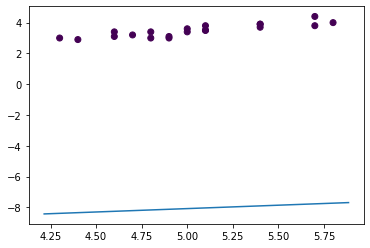

In [78]:
plt.scatter(x_test[:,0], x_test[:,1],c=y_test)
ax=plt.gca()
xvalue=np.array(ax.get_xlim())
yvalue=-(xvalue*w[0][0]+b[0])/w[0][1]
plt.plot(xvalue,yvalue)

